In [13]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [14]:
n = 4
K = 1 
alpha = 1 
T = 3 # s
Q = 100 # kg / ms
Lx = 30 # m
Ly = 20 # m
a = n / 1.4 # m
b = 60 / (n+5) # m

dx = 0.5 # m
dy = 0.5 # m
dt = 0.05

a = int(a / dx)
b = int(b / dy)

tempo_total = 10*T
tempo = np.arange(0, tempo_total, dt)


coluna = int(Lx/dx) # numero de colunas
linha = int(Ly/dy) # numero de linhas
M = np.zeros((linha, coluna))


Text(0.5, 1.0, 'concentração')

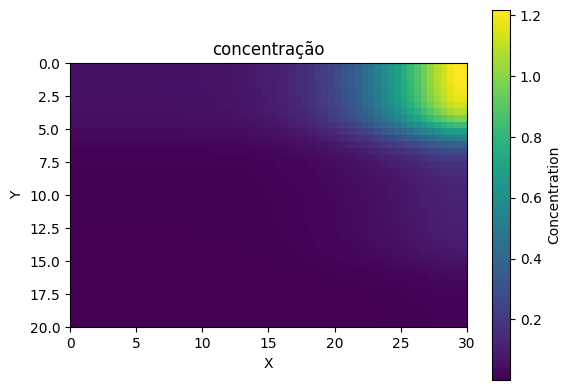

In [15]:
for t in range(len(tempo)):
    Cf = np.copy(M)

    if t <= T / dt:
        M[a, b] += (Q / (dx * dy)) * dt # kg / ms

    for l in range(1, linha - 1):
        for c in range(1, coluna - 1):

            u = alpha
            v = alpha * np.sin(np.pi * l * dx / 5)

            t1 = -v * (M[l + 1, c] - M[l - 1, c]) / (2 * dx)
            t2 = -u * (M[l, c + 1] - M[l, c - 1]) / (2 * dy)
            t3 = K * (M[l + 1, c] - 2 * M[l, c] + M[l - 1, c]) / dx ** 2
            t4 = K * (M[l, c + 1] - 2 * M[l, c] + M[l, c - 1]) / dy ** 2
            
            Cf[l, c] = M[l, c] + dt * (t1 + t2 + t3 + t4)
            
            if Cf[l, c] < 0:
                Cf[l, c] = 0
    
    Cf[0,:] = Cf[1,:]
    Cf[-1,:] = Cf[-2,:]
    Cf[:,0] = Cf[:,1]
    Cf[:,-1] = Cf[:,-2]

    M = np.copy(Cf)

    

       
    

#fazendo o gráfico
plt.imshow(M, cmap = 'viridis', extent = [0, Lx,Ly,0])
plt.colorbar(label='Concentration')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("concentração")

